In [54]:
import numpy as np
import cv2
import os
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.optimizers import Adam
from keras.models import Sequential
from keras.models import load_model
from keras.applications import VGG19
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , MaxPooling2D
from keras.utils import to_categorical

In [55]:
DATA_DIR = "C:/Users/LEGION/OneDrive/Desktop/flowers"
LABELS_5 = ["daisy", "dandelion", "rose", "sunflower", "tulip"]

In [56]:
def get_flower_data(dir_path, label_dir):
    img_size = 80
    flower_data = []
    labels=[]
    for label in label_dir: 
        path = os.path.join(dir_path, label)
        class_num = label_dir.index(label)
        for img in os.listdir(path):
                try:
                    img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                    resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                    flower_data.append(resized_arr)
                    labels.append(class_num)
                except Exception as e:
                    print(str(e))
    return flower_data, labels

In [57]:
flower_data, labels=get_flower_data(DATA_DIR, LABELS_5)

OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-6sxsq0tp\opencv\modules\imgproc\src\resize.cpp:3929: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-6sxsq0tp\opencv\modules\imgproc\src\resize.cpp:3929: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-6sxsq0tp\opencv\modules\imgproc\src\resize.cpp:3929: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'



In [58]:
flower_data=np.array(flower_data)/255.0
labels = np.array(labels)
labels = to_categorical(labels,num_classes = 5)

In [59]:
x_train,x_test,y_train,y_test=train_test_split(flower_data,labels,random_state=0)
x_train,x_validate,y_train,y_validate=train_test_split(x_train,y_train,random_state=0)

In [60]:
def cnn_model_1(img_size,channels):
    
    model = Sequential()

    # 1st Convolutional Layer
    model.add(Conv2D(filters=64, kernel_size=(3,3),padding="Same",activation="relu" , input_shape = (img_size,img_size,channels)))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

    # 2nd Convolutional Layer
    model.add(Conv2D(filters=128, kernel_size=(3,3),padding="Same",activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

    # 3rd Convolutional Layer
    model.add(Conv2D(filters=256, kernel_size=(3,3),padding="Same",activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

    # 4th Convolutional Layer
    model.add(Conv2D(filters=512, kernel_size=(3,3),padding="Same",activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Dropout(0.5))
    
    # 4th Convolutional Layer
    model.add(Conv2D(filters=1024, kernel_size=(3,3),padding="Same",activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

    model.add(Flatten())
    # 1st Fully Connected Layer
    model.add(Dense(1024,activation="relu"))
    model.add(Dropout(0.5))
    # Add output layer
    model.add(Dense(5,activation="softmax"))
    
    model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])
    
    return model
IMG_SIZE=80
CHANNELS=3
model=cnn_model_1(img_size=IMG_SIZE,channels=CHANNELS)
model.summary()


'''
pretrained_model = VGG19(input_shape = (IMG_SIZE, IMG_SIZE, CHANNELS), include_top = False, weights = 'imagenet')
pretrained_model.summary()

for layer in pretrained_model.layers[:19]:
    layer.trainable = False

model = Sequential(
    [
        pretrained_model,
        Dense(1024,activation='relu'),
        Flatten(),
        Dense(5, activation = 'softmax')
    ]
)

model.summary()

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
x_train.shape,y_train.shape,x_validate.shape,y_validate.shape,x_test.shape,y_test.shape
history = model.fit(datagen.flow(x_train,y_train), epochs = 20, validation_data =(x_validate,y_validate))

'''


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 80, 80, 64)        1792      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 40, 40, 64)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 40, 40, 128)       73856     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 20, 20, 128)       0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 20, 20, 256)       295168    
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 10, 10, 256)       0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 10, 10, 512)      

In [61]:
history = model.fit(x_train,y_train,epochs=20,validation_data=(x_validate,y_validate))

Train on 2431 samples, validate on 811 samples
Epoch 1/20
2431/2431 [==============================] - 8s 3ms/step - loss: 1.5614 - accuracy: 0.2830 - val_loss: 1.2832 - val_accuracy: 0.4550
Epoch 2/20
2431/2431 [==============================] - 6s 2ms/step - loss: 1.3202 - accuracy: 0.4081 - val_loss: 1.1825 - val_accuracy: 0.5006
Epoch 3/20
2431/2431 [==============================] - 6s 2ms/step - loss: 1.1797 - accuracy: 0.4866 - val_loss: 1.0846 - val_accuracy: 0.5314
Epoch 4/20
2431/2431 [==============================] - 6s 2ms/step - loss: 1.1134 - accuracy: 0.5352 - val_loss: 1.0759 - val_accuracy: 0.5721
Epoch 5/20
2431/2431 [==============================] - 6s 2ms/step - loss: 1.0027 - accuracy: 0.5911 - val_loss: 0.9194 - val_accuracy: 0.6387
Epoch 6/20
2431/2431 [==============================] - 6s 2ms/step - loss: 0.9199 - accuracy: 0.6335 - val_loss: 0.9127 - val_accuracy: 0.6498
Epoch 7/20
2431/2431 [==============================] - 6s 2ms/step - loss: 0.8810 - accu

In [63]:
model.save_weights('flower_model.h5')

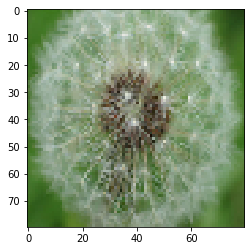

In [89]:
dict_flower={0:'daisy', 1:'dandelion', 2:'rose', 3:'sunflower', 4:'tulip'}


import matplotlib.pyplot as plt
#img = plt.imread('rose.jpg')
img = plt.imread('boconganh.jpg')
img=cv2.resize(img,(80,80))
rows,cols,colors = img.shape # gives dimensions for RGB array
img_size = rows*cols*colors
img_1D_vector = img.reshape(img_size)
# you can recover the orginal image with:
img2 = img_1D_vector.reshape(rows,cols,colors)
img2=img2*(1./255)
img2 = np.expand_dims(img2, axis=0)
maxindex=np.argmax(model.predict(img2))
plt.imshow(img)

In [90]:
dict_flower[maxindex]

'dandelion'